# How to Build and Test a Data Engineering Pipeline

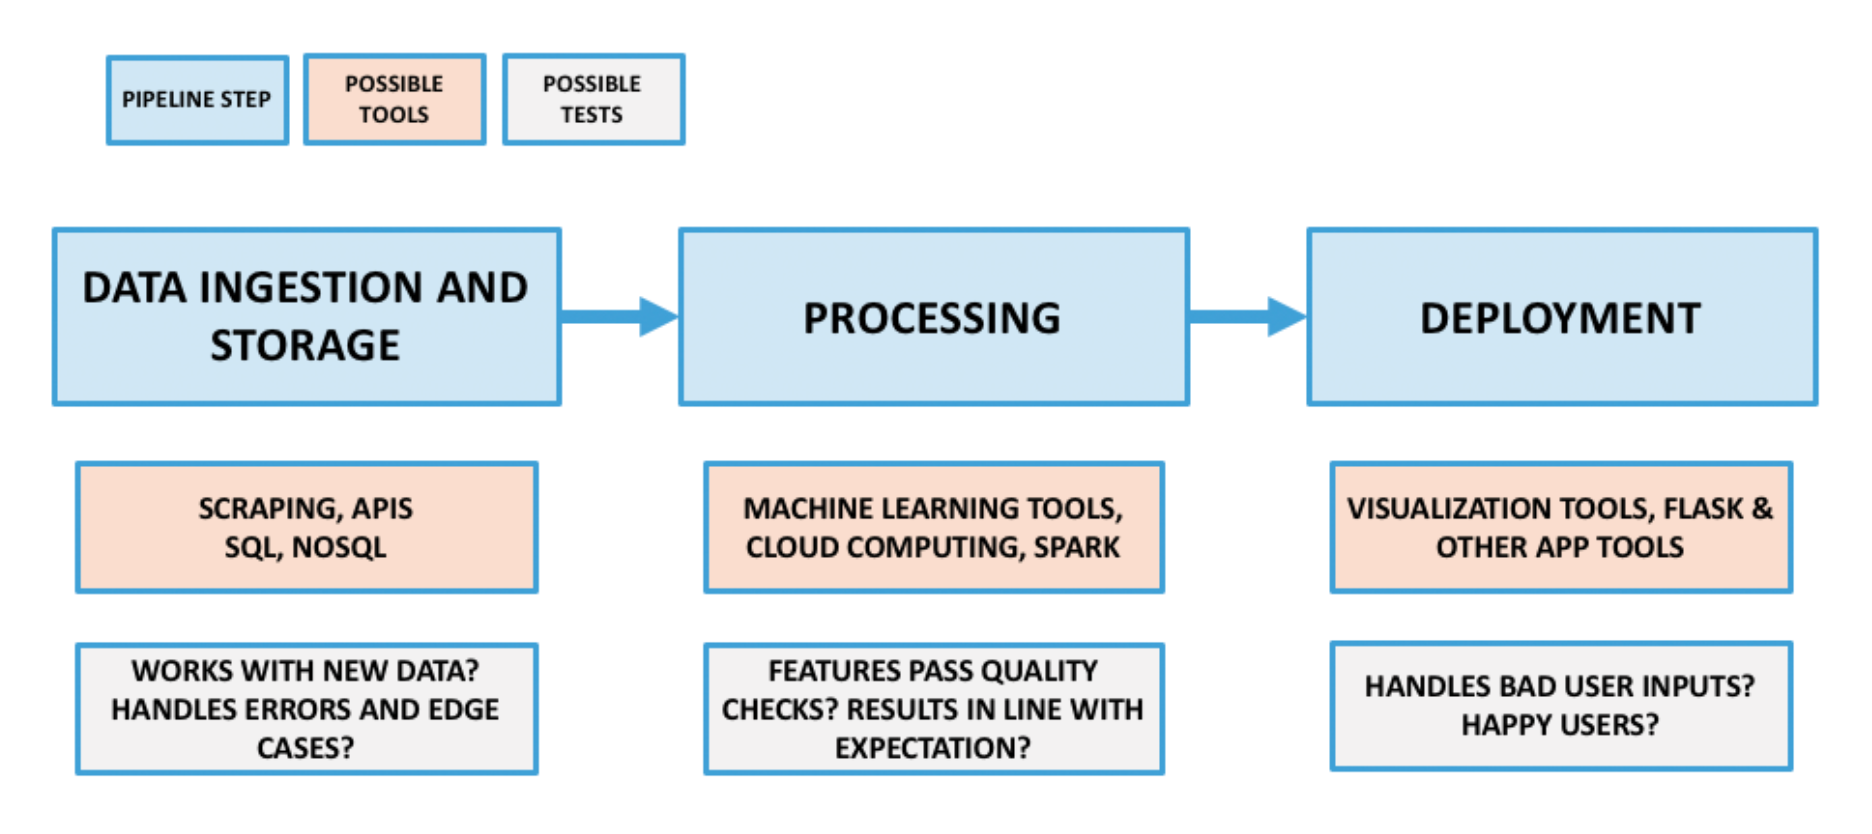

**1. Scope out the data engineering problem and data source, drafting the pipeline**

* **Identify problem and data source**: determine a problem area where your data engineering skills may provide value, and find a data source that lets you address this problem. Envision what an end-user would want or need, such as a user-friendly web app or visual summary of analysis run on your data. Once you have an end product in mind, you can start to shape the earlier parts of your pipeline with the goal of arriving at that end. 


* **Sketch the entire pipeline**: from the start, think about how each of the steps below relates to your end goal and data source. If you are trying to deploy a predictive model as a web app, does the data provide for a useful and clearly defined machine learning problem? If you want to use big data tools to process a massive dataset, have you identified questions to ask about the data that will provide insight? Also map out the tools that you intend to use for each step, describing why they are appropriate or useful, and describing how they will fit together into the pipeline. For example, if you plan to use Google Cloud for the processing in Step 3, have you thought about hosting your database on your cloud instance to make the storage-processing link easier? 

**2. Tackle data ingestion and storage**

* **Data ingestion:** develop reusable code for acquiring your chosen data and transferring it to your chosen database/storage solution. This code should include the use of any acquisition  tools, data cleaning, formatting, or error handling needed for reliably structuring the data to be easily loaded into a database. 

Example: use BeautifulSoup to scrape a mix of data types from eBay, clean up the formatting of dollar amounts and auction dates in Python, and convert the data into tabular CSV format that can be loaded into a SQL database.  

Example: use a Python wrapper of an API to pull JSON files that can be read directly into a Mongo database (be careful to note that under this "storage now structure layer" style of ingestion, there may be a heavier lift for data cleaning in the processing stage. For example, hierarchical Mongo documents would need to be flattened before they can be used as machine learning data points).

* **Data storage**: choose an appropriate database type for handling the structure of your data, either SQL or NoSQL (such as MongoDB). Create the database and load your data into this database for persistent storage, preferably with reusable code. Confirm that the data was inserted into the database as intended by running simple queries and/or performing a series of data quality checks. 

Example: after scraping eBay data on users and product listings into CSV files, design a SQL schema for a relational database with tables for users, listings, etc. Then write Python and/or SQL code that loads the CSV data into these tables.   
Example: load a series of JSON files with data on books and their authors directly into a MongoDB collection.

_Testing_

* Ingesting new data: what happens if you need to acquire new data and add it to the database? Will the acquisition code still work and properly update the database?   


* Database error and edge case tolerance: what happens if you attempt to load problematic or extreme data into the database? Try expanding the data acquired, or even introducing intentional errors to see if you’re properly handling them. Is your schema designed for resilience, properly handling all correct data while disallowing incorrect data? E.g. a very long home description may be allowable, but multiple home listings that share the same address should not be.


* Database quality control: does the ingested data align with expectations/requirements? E.g., do prices fall in a sensible range (strictly positive!) and do dates line up with the timeline you expected? You can develop unit tests that explore data properties, ensuring that any data quality issues that emerge over time are clearly flagged when running the pipeline. 

**3. Build a processing framework**

Develop reusable code for tackling the core computational challenge of your pipeline. Read data from the database into Python, performing any additional data cleaning or configuration needed at this stage. Then complete the data analysis, feature engineering, model training, etc. that your use case requires. Depending on the scale of your data and specific project needs, this step may call for leveraging key tools such as cloud computing for additional compute resources or big data handling tools such as Spark (see the Introduction to Spark and/or PySpark Lab). 


Structure the output of this step to be easily used as an input to the final step -- e.g. save a trained model in .pkl (Python's pickle) format to be loaded by a web app server, save a summary of a large dataset in tabular format that allows for easy creation of visuals, etc. 

* Example: end product is a web app that predicts a reasonable market value for a user's home. Train and save a regression model with home listing data that includes prices, first imputing missing feature values and following the usual best practices for selecting and evaluating a predictive model (remember proper validation and testing!).


* Example: end product is a visual summary of key findings from a massive set of customer product transactions. Use Spark to compute a series of key statistics broken down by product, saving these statistics to a CSV file that will later be used to build visualizations. 

_Testing_

* Model input: similar to database quality control, do the features fed into the model align with expectations? In particular, can you make sure that any model-breaking errors are appropriately flagged, such as unhandled nulls or non-numerical data types?


* Model output: does the saved model properly reload and make predictions? Do the model performance statistics (e.g. accuracy scores on a test set) fall within the expected range? Make sure to flag a significant/unexpected change in performance on new data as a possible error.  


* Analysis output: does the output of an analysis/summary align with expectations, in terms of both format and numbers? Do the summary statistics change significantly between different runs? This could be an error, or may be an interesting insight in its own right, e.g., if a product’s popularity changes drastically over time. 

4. Deploy the processing framework as a service

Complete the pipeline by using the output of Step 3 to provide a concrete, accessible service. The output of this step should be user-friendly, visually pleasing, etc. Remember that the purpose of all the challenging engineering work is to create an end product that's easy to use and digest, justifying all of the infrastructure and automation that comes before it.      

* Example: design a simple Flask app that predicts a reasonable market value for a user's home and deploy it with Heroku. The web app server will load a pre-trained model (Step 3), while the user/client will input feature values such as square footage and number of bedrooms. The server then handles any cleaning or preprocessing that needs to be done, makes predictions, and displays them clearly to the user.


* Example: create a set of visually pleasing, informative charts, in a report or as a dashboard, summarizing key findings from a massive set of customer product transactions. 

_Testing_

* App/dashboard stability: how robust is your web app? How does it handle unusual or problematic inputs from the user? Is it easy for the user to break things? Try to provide helpful warnings where applicable, and build in error-handling and careful preprocessing to prevent situations such as running a model on incorrectly formatted inputs.


* User interaction: this may be difficult to replicate in a short project, but letting users spend time interacting with your end service and giving feedback is naturally the best way to make sure that it's user-friendly and giving them what they want!

## General Pipeline Considerations

**Full pipeline automation**: as much as possible, try to construct your pipeline as an end-to-end process. For example, if the individual pipeline steps are broken out into a series of SQL and Python scripts, put together a simple shell script that runs each step consecutively. The ideal to strive for is that, as is usually the case in real world applications, updating your model or analysis requires minimal additional work. You want to be able to press a button, and then just check out the results / let your users see the updates as quickly as possible! Good testing/error handling is part of the infrastructure that supports this, because it can give you more confidence that everything you've automated is working properly and as expected; and when something goes wrong, you can identify with precision where to fix errors. For this project, you'll be rewarded if you can demonstrate/simulate the reusability and robustness of your pipeline by showing what happens if you run it on updated data.

**Coding best practices and efficiency**: as much as possible, try to incorporate best practices in programming principles and algorithmic design. For example, use object-oriented programming where possible to modularize your code, and write good unit tests for the various stages of your pipeline. Always keep computational and memory complexity in mind as you design your pipeline and choose which data structures to use.